In [1]:
!(pip uninstall --no-input swagger-client && pip install --no-cache-dir ./stable-diffusion-api/clients/python)

Processing c:\users\smamgain\projects\stable-diffusion-on-azure\stable-diffusion-api\clients\python
  Created wheel for swagger-client: filename=swagger_client-1.0.0-py3-none-any.whl size=21093 sha256=e27bb36a53242fbda67717dc7d3e63b73e08525260cd98e541748575d04fd2df
  Stored in directory: C:\Users\smamgain\AppData\Local\Temp\pip-ephem-wheel-cache-allh9pvz\wheels\d6\e3\f3\3bbb8f3efb3c01b65802076cc88a13312ac37fcac8b3e2142f
Successfully built swagger-client


You should consider upgrading via the 'C:\Users\smamgain\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install Pillow

You should consider upgrading via the 'C:\Users\smamgain\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
with open('online-endpoint-key.txt') as f:
    key = f.read()

In [4]:
import swagger_client
from swagger_client.rest import ApiException

config = swagger_client.Configuration()
config.host = '<azure-ml-inference-host>'
# config.api_key['Authorization'] = ''
# config.api_key_prefix['Authorization'] = 'Bearer'
api = swagger_client.DefaultApi(swagger_client.ApiClient(config))
api.api_client.default_headers['Authorization'] = f'Bearer {key}'

In [21]:
inp = swagger_client.Txt2ImgInput(
    # prompt='A corgi wearing a top hat, suit and monocle, oil painting',
    prompt='Astronaut riding a horse on the moon, realistic, 8k, high definition', n_samples=2,
    seed=123,
)
try:
    output = api.txt2img(inp)
except ApiException as exc:
    print(exc)

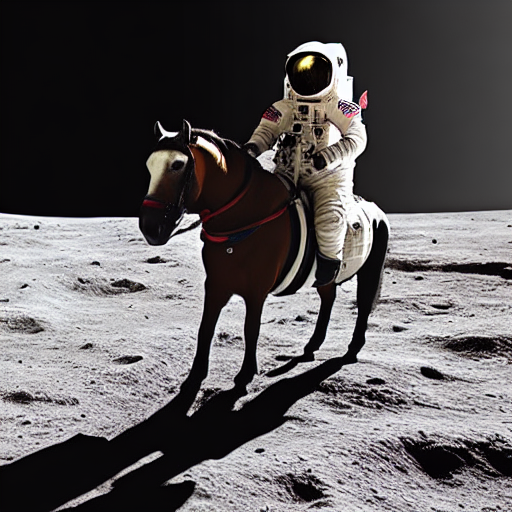

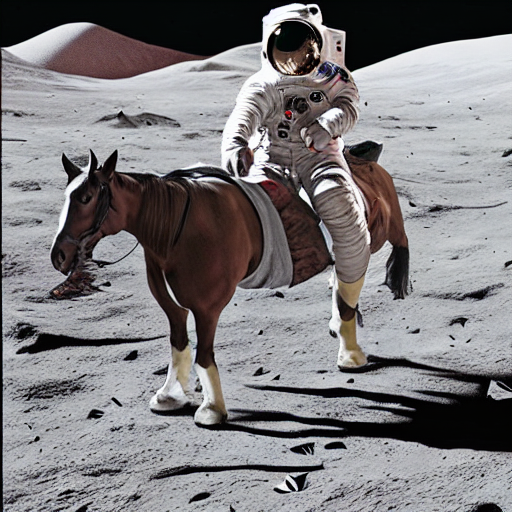

In [22]:
from base64 import b64decode
from io import BytesIO
from PIL import Image
from IPython.display import display

for iteration in output.iterations:
    for sample in iteration:
        img = Image.open(BytesIO(b64decode(sample['image']['base64'])))
        display(img)

In [9]:
swagger_client.Txt2ImgInput?